<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/Probability_Calibration/01_Probability_Calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import warnings

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.calibration import (
    CalibratedClassifierCV,
    calibration_curve)

from sklearn.model_selection import (
    train_test_split, GridSearchCV)

from sklearn.metrics import brier_score_loss

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

The purpose of this exercise is to validate the process of model calibration when the focus is on probabilities. Binary and multiclass classification will be explored. The methods 'CalibratedClassifierCV', 'calibration_curve', and the metric 'brier_score_loss' will be used

# **Settings**
---

In [292]:
random_seed=12345
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

# **Data**
---

For the different configurations in the calibration process, synthetic data will be generated with different configurations.

In [293]:
def data_generator(**kward):
  X, y = make_classification(
      random_state = random_seed,
      **kward
  )
  return X, y

# **Calibration**
---

## **Uncalibrated model, not ensemble**
---
- The model will be a non-'ensemble' model and will not be trained.

**Data**

A synthetic dataset of 800 records will be generated, with 10 features, of which 8 will be informative and 2 will be redundant. It will be a binary classification dataset, with a classification error rate of 8% and a separation of 0.5.

In [294]:
X, y = data_generator(
    **{
      "n_samples":800,
      "n_features":10,
      "n_informative":8,
      "n_redundant":2,
      "n_classes":2,
      "flip_y":0.08,
      "class_sep":0.5
      }
)

**Data Split**

In [295]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=random_seed
)

**Model**

A decision tree is instantiated with basic configurations and without fit.

In [296]:
model_tree = DecisionTreeClassifier(
    max_depth = 5,
    random_state=random_seed
)

The model's probabilities are calibrated using the 'CalibratedClassifierCV' function with 10 'cv' and the 'sigmoid' method.

In [297]:
calibrate_model_tree = CalibratedClassifierCV(
    estimator=model_tree,
    method='sigmoid',
    cv=10,
    ensemble=False,
)
calibrate_model_tree.fit(X_train, y_train)

CalibratedClassifierCV(cv=10, ensemble=False,
                       estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=12345))

The test probabilities are obtained.

In [298]:
calibreated_probs_test = calibrate_model_tree.predict_proba(X_test)

The previously configured, uncalibrated model is fitted. Then, probability predictions are made. This is done to compare the model's calibration


In [299]:
model_tree.fit(X_train, y_train)

model_probs_test = model_tree.predict_proba(X_test)

Having the probabilities, a comparison is made between the calibrated model and the fitted model.

It will be assumed that class 1 is the class of interest, however, the process will be validated with both classes

In [300]:
X_test.shape[0]/50

4.0

In [301]:
calibreated_probs_test.shape[0]/50

4.0

In [302]:
prob_true_cali_target, prob_pred_cali_target = calibration_curve(y_test, calibreated_probs_test[:,1], n_bins=20)
prob_true_cali_no_target, prob_pred_cali_no_target = calibration_curve(y_test, calibreated_probs_test[:,0], n_bins=5)

prob_true_model_target, prob_pred_model_target = calibration_curve(y_test, model_probs_test[:,1], n_bins=20)
prob_true_model_no_target, prob_pred_model_no_target = calibration_curve(y_test, model_probs_test[:,0], n_bins=5)

In [304]:
brier_score = brier_score_loss(y_test, calibreated_probs_test[:, 1])
brier_score

0.20694873301518107

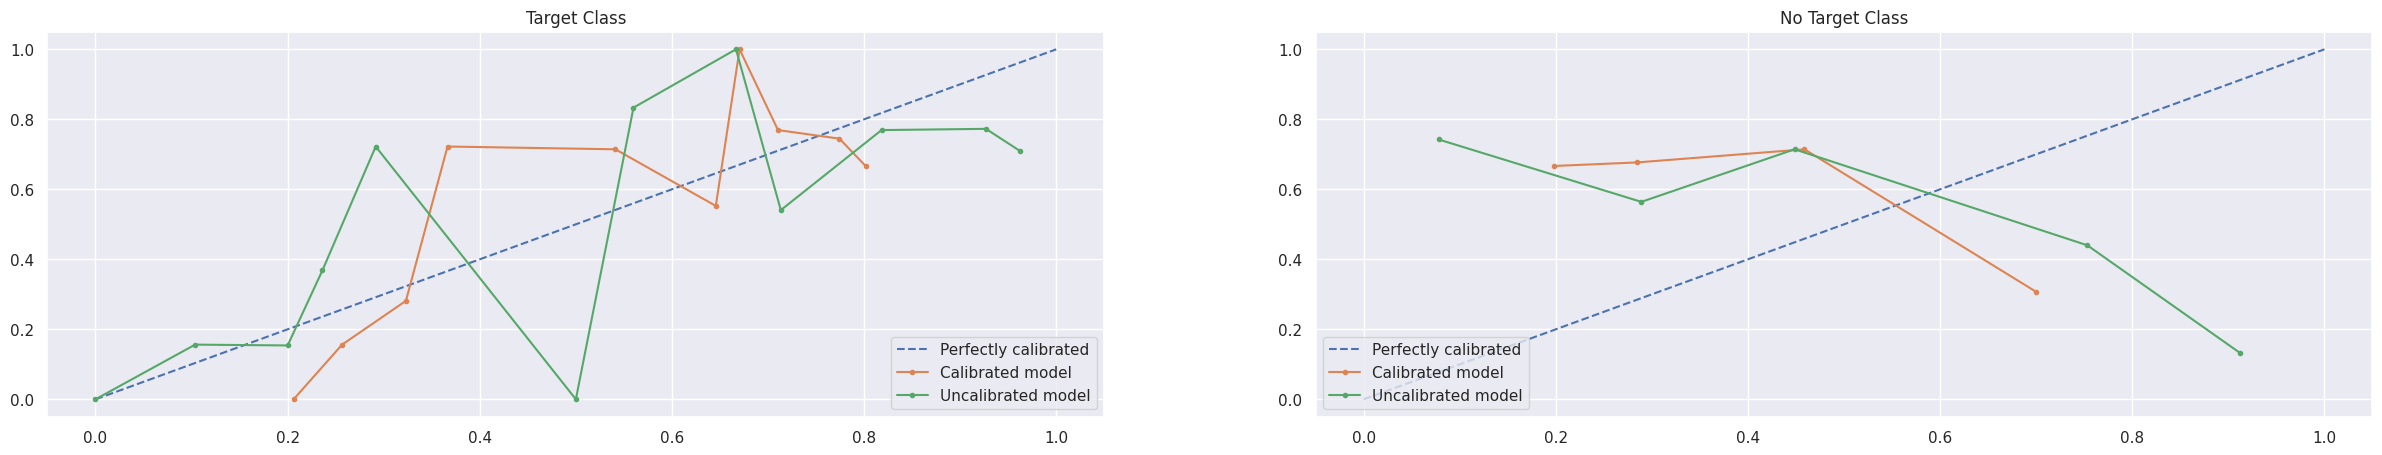

In [305]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 5))
ax[0].plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
ax[0].plot(prob_pred_cali_target, prob_true_cali_target, marker='.', label='Calibrated model')
ax[0].plot(prob_pred_model_target, prob_true_model_target, marker='.', label='Uncalibrated model')
ax[0].set_title("Target Class")
ax[0].legend(loc='lower right')
ax[1].plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
ax[1].plot(prob_pred_cali_no_target, prob_true_cali_no_target, marker='.', label='Calibrated model')
ax[1].plot(prob_pred_model_no_target, prob_true_model_no_target, marker='.', label='Uncalibrated model')
ax[1].legend(loc='lower left')
ax[1].set_title("No Target Class")
plt.show()

In [ ]:
print('No hay una probabilidad inferior a 0.20 y superior a 0.8')

In [ ]:
prob_true_cali_target

In [ ]:
calibreated_probs_test[:,1].max()

(array([ 6., 32.,  0., 13., 19., 18.,  0.,  0.,  0.,  0.,  1.,  6.,  0.,
         2., 36.,  1., 13.,  0., 22., 31.]),
 array([0.20621635, 0.23598394, 0.26575154, 0.29551913, 0.32528673,
        0.35505432, 0.38482192, 0.41458951, 0.44435711, 0.47412471,
        0.5038923 , 0.5336599 , 0.56342749, 0.59319509, 0.62296268,
        0.65273028, 0.68249787, 0.71226547, 0.74203306, 0.77180066,
        0.80156825]),
 <BarContainer object of 20 artists>)

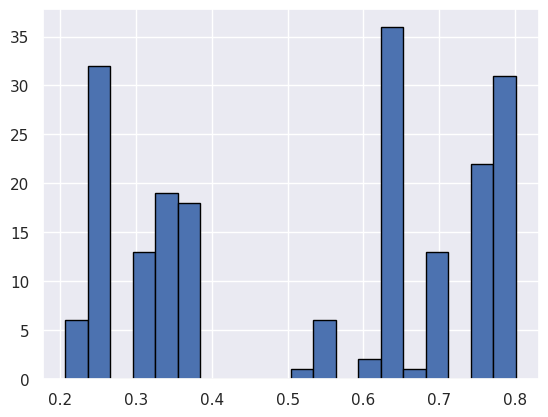

In [306]:
plt.hist(calibreated_probs_test[:,1], bins=20, edgecolor='black')

In [ ]:
asdasdasd